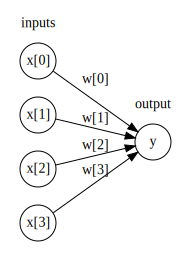

In [17]:
import mglearn
import matplotlib.pyplot as plt 
%matplotlib inline 

mglearn.plots.plot_logistic_regression_graph()

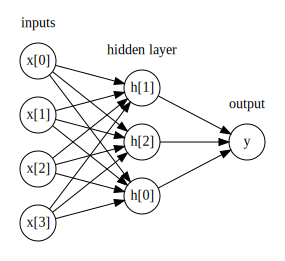

In [9]:
mglearn.plots.plot_single_hidden_layer_graph()

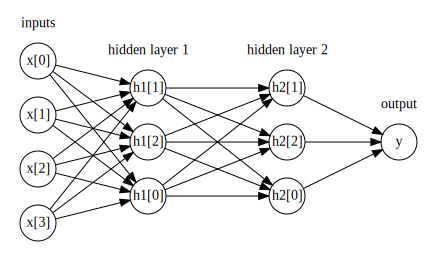

In [10]:
mglearn.plots.plot_two_hidden_layer_graph()

In [11]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test , y_train , y_test = train_test_split (cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train,y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(mlp.score(X_test,y_test)))


Accuracy on the training subset: 0.939
Accuracy on the testing subset: 0.916


In [12]:
# a low accuracy comparing to the previous algorithms, this may be due to the scaling of the data, the fact that the features of each cancer sample are not at the same scale 
print('The maximum per each feature:\n{}'.format(cancer.data.max(axis=0))) 

The maximum per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [14]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)
mlp= MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)
print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))


Accuracy on the training subset: 1.000
Accuracy on the testing subset: 0.958


In [15]:
# there still discrepancy and gap between the accuracy on the training subset and the testing one 
mlp

MLPClassifier(max_iter=1000, random_state=42)

In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled,y_train)
print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Accuracy on the training subset: 0.986
Accuracy on the testing subset: 0.972


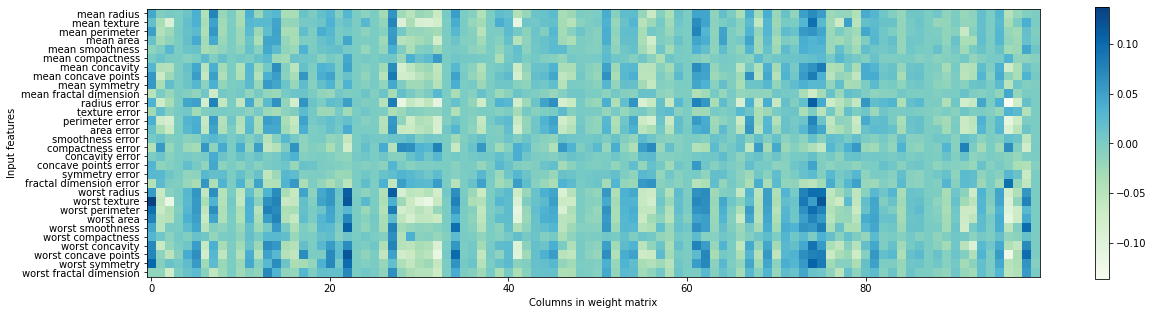

In [18]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input features')
plt.colorbar()

In [ ]:
# Advantages : 
# - Can be used effocoently on large datasets 
# - Can build very complexe models 
# - many parameters for tuning 
# - flexibility and rapid prototyping 

# Disadvantages : 
# - many parameters for tuning 
# - some solvers are scale sensitive 
# - data may need to be pre-processed 

# Alternatives : 
# - theano / tensorflow / keras / lasagna 
